# Ensemble Learning

**Types:**
- Voting Ensemble Learning
- Bagging
    - Random Forest
- Boosting
    - AdaBoost
    - Gradient Boosting
    - XgBoost
- Stacking

## How it works?
![Ensemble Learning](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2020/07/Example-of-Combining-Decision-Boundaries-Using-an-Ensemble.png)

![Ensemble Learning](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2020/07/Example-of-Combining-Hyperplanes-Using-an-Ensemble.png)

## Benefits
- Improvement in performance
- Bias and Variance are reduced
- Robustness

## When to use?
**Sort answer is always.**


# Voting Ensemble Learning

![Voting Ensemble Learning](https://i.ytimg.com/vi/EFk21H6Q1ew/hqdefault.jpg)

**Assumptions:**
- The models should be independent. The voting classifier will be best if the models are very very much dissimilar.
- The minimum accuracy of the models should be 51%.

## Voting Type - Hard/Soft
Let's say there are 2 models into your voting ensemble learning for a classification problem. The first models says that the probability to be a category 0 is 0.6 and 0.4 for category 1. And the second model predicts 0.8 for category 0 and 0.2 for category 1.

If the voting type is hard, then voting ensembled will pick up the majority model's decision and that's category 0. And if the voting type is soft, then average probability of category 0 is $\frac{0.6 + 0.8}{2} = 0.7$ and average probability of category 1 is $\frac{0.4 + 0.2}{2} = 0.3$. So the ensembled learning result for that prediction will be 0.

![Voting Ensemble Learning](https://iq.opengenus.org/content/images/2020/01/ud382N9.png)

## Voting Classifier

In [1]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("../Datasets/Iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# remove Id column
df = df.iloc[:, 1:]

In [4]:
# label encode species
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Species"] = encoder.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


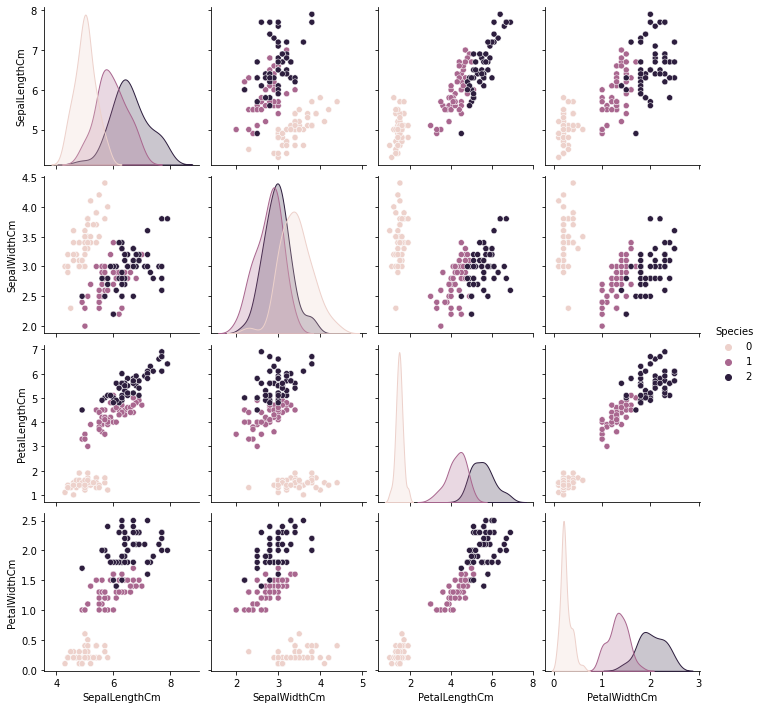

In [5]:
import seaborn as sns

sns.pairplot(df, hue = "Species")

In [7]:
new_df = df[df["Species"] != 0][["SepalLengthCm", "SepalWidthCm", "Species"]]
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [8]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [10]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [11]:
estimators = [("lr", clf1), ("rf", clf2), ("knn", clf3)]

In [12]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv = 10, scoring = "accuracy")
    print(estimator[0], np.round(np.mean(x), 2))

lr 0.81
rf 0.72
knn 0.75


In [13]:
from sklearn.ensemble import VotingClassifier

### Hard Voting

In [15]:
# Hard Voting
vc = VotingClassifier(estimators = estimators, voting = "hard")
x = cross_val_score(vc, X, y, cv = 10, scoring = "accuracy")
print(np.round(np.mean(x), 2))

0.76


### Soft Voting

In [16]:
# Soft Voting
vc1 = VotingClassifier(estimators = estimators, voting = "soft")
x = cross_val_score(vc1, X, y, cv = 10, scoring = "accuracy")
print(np.round(np.mean(x), 2))

0.75


### Weighted Voting

In [17]:
# WEIGHTED VOTING
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            vc = VotingClassifier(estimators = estimators, voting = "soft", weights = [i, j, k])
            x = cross_val_score(vc, X, y, cv = 10, scoring = "accuracy")
            print(f"for i={i}, j={j}, k={k} {np.round(np.mean(x), 2)}")

for i=1, j=1, k=1 0.76
for i=1, j=1, k=2 0.75
for i=1, j=1, k=3 0.73
for i=1, j=2, k=1 0.75
for i=1, j=2, k=2 0.75
for i=1, j=2, k=3 0.75
for i=1, j=3, k=1 0.74
for i=1, j=3, k=2 0.74
for i=1, j=3, k=3 0.73
for i=2, j=1, k=1 0.78
for i=2, j=1, k=2 0.77
for i=2, j=1, k=3 0.75
for i=2, j=2, k=1 0.75
for i=2, j=2, k=2 0.75
for i=2, j=2, k=3 0.75
for i=2, j=3, k=1 0.73
for i=2, j=3, k=2 0.76
for i=2, j=3, k=3 0.75
for i=3, j=1, k=1 0.8
for i=3, j=1, k=2 0.78
for i=3, j=1, k=3 0.77
for i=3, j=2, k=1 0.77
for i=3, j=2, k=2 0.77
for i=3, j=2, k=3 0.77
for i=3, j=3, k=1 0.75
for i=3, j=3, k=2 0.76
for i=3, j=3, k=3 0.76


### With Same Algorithm (Classification)

In [23]:
# Classifiers of Same Algo
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 2)

svm1 = SVC(probability = True, kernel = "poly", degree = 1)
svm2 = SVC(probability = True, kernel = "poly", degree = 2)
svm3 = SVC(probability = True, kernel = "poly", degree = 3)
svm4 = SVC(probability = True, kernel = "poly", degree = 4)
svm5 = SVC(probability = True, kernel = "poly", degree = 5)

estimators = [("svm1", svm1), ("svm2", svm2), ("svm3", svm3), ("svm4", svm4), ("svm5", svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv = 10, scoring = "accuracy")
    print(estimator[0], np.round(np.mean(x), 2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [24]:
vc1 = VotingClassifier(estimators = estimators, voting = "soft")
x   = cross_val_score(vc1, X, y, cv = 10, scoring = "accuracy")
print(np.round(np.mean(x), 2))

0.92


## Voting Regressor

In [25]:
from sklearn.datasets import load_boston
import numpy as np

In [26]:
X,y = load_boston(return_X_y=True)

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [28]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [29]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]

for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, scoring='r2', cv=10)
    print(estimator[0],np.round(np.mean(scores), 2))

lr 0.2
dt -0.11
svr -0.41


In [30]:
from sklearn.ensemble import VotingRegressor

vr     = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.43


In [31]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vr = VotingRegressor(estimators,weights=[i,j,k])
            scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
            print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))

For i=1,j=1,k=1 0.43
For i=1,j=1,k=2 0.35
For i=1,j=1,k=3 0.25
For i=1,j=2,k=1 0.39
For i=1,j=2,k=2 0.41
For i=1,j=2,k=3 0.35
For i=1,j=3,k=1 0.24
For i=1,j=3,k=2 0.4
For i=1,j=3,k=3 0.29
For i=2,j=1,k=1 0.47
For i=2,j=1,k=2 0.38
For i=2,j=1,k=3 0.36
For i=2,j=2,k=1 0.46
For i=2,j=2,k=2 0.44
For i=2,j=2,k=3 0.4
For i=2,j=3,k=1 0.4
For i=2,j=3,k=2 0.44
For i=2,j=3,k=3 0.35
For i=3,j=1,k=1 0.45
For i=3,j=1,k=2 0.41
For i=3,j=1,k=3 0.4
For i=3,j=2,k=1 0.44
For i=3,j=2,k=2 0.46
For i=3,j=2,k=3 0.42
For i=3,j=3,k=1 0.37
For i=3,j=3,k=2 0.44
For i=3,j=3,k=3 0.39


In [32]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

In [33]:
estimators = [('dt1',dt1), ('dt2',dt2), ('dt3',dt3), ('dt4',dt4), ('dt5',dt5)]

for estimator in estimators:
    scores = cross_val_score(estimator[1], X,y,scoring='r2', cv=10)
    print(estimator[0],np.round(np.mean(scores),2))

dt1 -0.85
dt2 -0.23
dt3 -0.07
dt4 0.11
dt5 -0.04


In [34]:
vr     = VotingRegressor(estimators)
scores = cross_val_score(vr, X, y, scoring='r2', cv=10)
print("Voting Regressor", np.round(np.mean(scores), 2))

Voting Regressor 0.15


# Bagging Ensemble Learning

**Here only one type algorithm is used but every model will be trained for different data.**

![Bagging](https://www.researchgate.net/profile/Ryan-Byrne-2/publication/334404567/figure/fig4/AS:862185249071106@1582572390782/Illustrations-of-A-bagging-and-B-boosting-ensemble-algorithms.ppm)

![Bagging](https://lh4.googleusercontent.com/yreGz2Mc25obHnffMZXYAzEdyQ3KrFWFKAW2tBKgMw43tiLIkZYyyQgHkG2pNVWTVFUQVOzjPkvzK1wyotMKrhGHz-ONpkKA9jwrKVcUZrDMPqw4kibnkKdvb0-GI0g3PcXVcgbSfuU1uewGBw)

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.options.mode.chained_assignment = None

In [39]:
df = pd.read_csv("../Datasets/Iris/Iris.csv")
df = df.iloc[:, 1:]

encoder       = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


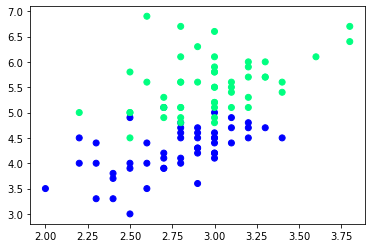

In [41]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], cmap='winter')
plt.show()

In [42]:
# Taking only 10 rows for training
df       = df.sample(100)             # shuffel the data
df_train = df.iloc[:60, :].sample(10)  # for training
df_val   = df.iloc[60:80, :].sample(5) # for validation
df_test  = df.iloc[80:, :].sample(5)   # for testing

In [49]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## Case 1 - Bagging
### Create Base DecisionTree Model-1

In [50]:
## Data for Tree 1 ##

# from 10 rows, we are taking 8, means we are taking 80% data. And py passing the "replace"
# parameter we can now get rows for multiple times. That means it is possible that there can be
# duplicate rows
df_bag = df_train.sample(8, replace=True) 

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
128,2.8,5.6,2
112,3.0,5.5,2
110,3.2,5.1,2
128,2.8,5.6,2
114,2.8,5.1,2
128,2.8,5.6,2
58,2.9,4.6,1


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [52]:
# create fully grown decision tree
dt_bag1 = DecisionTreeClassifier()

In [53]:
def evaluate(clf, X, y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

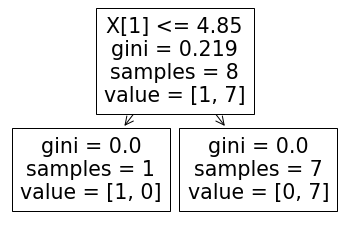

1.0


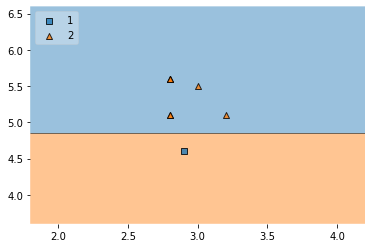

In [54]:
evaluate(dt_bag1, X, y)

### Create Base DecisionTree Model-2

In [55]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
112,3.0,5.5,2
58,2.9,4.6,1
110,3.2,5.1,2
114,2.8,5.1,2
128,2.8,5.6,2
114,2.8,5.1,2
110,3.2,5.1,2


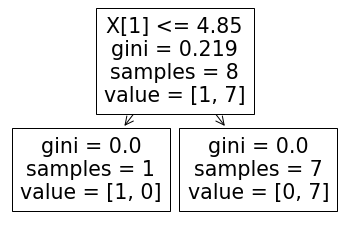

1.0


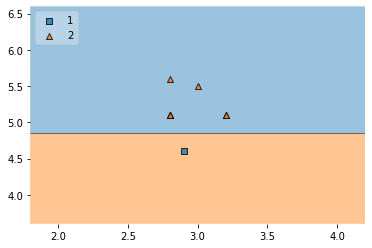

In [56]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

### Create Base DecisionTree Model-3

In [57]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
58,2.9,4.6,1
114,2.8,5.1,2
107,2.9,6.3,2
58,2.9,4.6,1
128,2.8,5.6,2
139,3.1,5.4,2
58,2.9,4.6,1


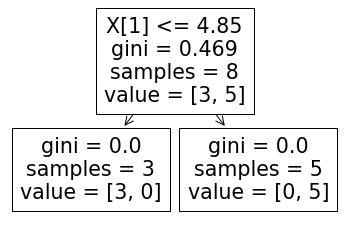

1.0


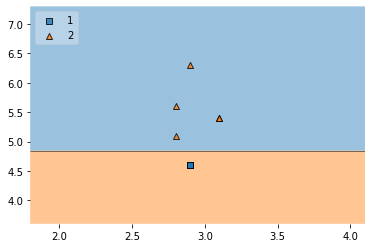

In [58]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Aggregation (Prediction)

In [59]:
df_test

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
121,2.8,4.9,2
108,2.5,5.8,2
85,3.4,4.5,1
145,3.0,5.2,2


In [61]:
print("Predictor 1", dt_bag1.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([3.6,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


In [65]:
print("Predictor 1", dt_bag1.predict(np.array([3.4, 4.5]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.4, 4.5]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([3.4, 4.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


## Pasting (Bagging Type 1)

In [66]:
# row sampling withour replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
81,2.4,3.7,1
72,2.5,4.9,1
107,2.9,6.3,2
112,3.0,5.5,2
114,2.8,5.1,2
144,3.3,5.7,2
139,3.1,5.4,2
110,3.2,5.1,2
128,2.8,5.6,2
58,2.9,4.6,1


In [67]:
# here no row is repeating but earlier it's doing
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
107,2.9,6.3,2
81,2.4,3.7,1
58,2.9,4.6,1
139,3.1,5.4,2
110,3.2,5.1,2
128,2.8,5.6,2
144,3.3,5.7,2


## Random Subspaces (Bagging Type 2)
You do **column sampling** with row replacement or without row replacement.

In [68]:
df1 = pd.read_csv("../Datasets/Iris/Iris.csv")
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
121,122,5.6,2.8,4.9,2.0,Iris-virginica
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


In [69]:
# column sampling
df1.sample(2, replace=True, axis=1)

,PetalLengthCm,SepalWidthCm
121,4.9,2.8
88,4.1,3.0
56,4.7,3.3
112,5.5,3.0
97,4.3,2.9
1,1.4,3.0
96,4.2,2.9
47,1.4,3.2
23,1.7,3.3
5,1.7,3.9


## Random Patches (Bagging Type 3)
**row sampling and column sampling together**

In [70]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
121,122,5.6,2.8,4.9,2.0,Iris-virginica
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


In [73]:
# column sampling and row sampling
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,PetalLengthCm,SepalWidthCm
5,1.7,3.9
97,4.3,2.9
56,4.7,3.3
5,1.7,3.9
5,1.7,3.9
5,1.7,3.9
23,1.7,3.3
23,1.7,3.3


## Bagging Classifier

In [74]:
from sklearn.datasets        import make_classification
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import BaggingClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.model_selection import train_test_split

In [75]:
X,y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Single DecisionTree Classifier

In [77]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.906


### Bagging Using DecisionTree

In [78]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators   = 500, # 500 decision tree models
    max_samples    = 0.5,
    bootstrap      = True,
    random_state   = 42
)

In [79]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [80]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.947

In [81]:
# because of max_samples, we are getting total this number of samples to train
bag.estimators_samples_[0].shape

(4000,)

In [82]:
# 10 columns we are using because we are not doing column sampling
bag.estimators_features_[0].shape

(10,)

### Bagging Using SVM

In [83]:
bag = BaggingClassifier(
    base_estimator = SVC(),
    n_estimators   = 500,
    max_samples    = 0.25,
    bootstrap      = True,
    random_state   = 42
)

In [84]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM", accuracy_score(y_test,y_pred))

Bagging using SVM 0.9175


### Pasting

In [85]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = False,  # Sampling without Replacement
    random_state = 42,
    verbose = 1,
    n_jobs = -1
)

In [86]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.6s remaining:   13.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


Pasting classifier 0.947


### Random Subspaces

In [87]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,          # all rows
    bootstrap=False,          # sampling without replacement
    max_features=0.5,         # 50% column will be used
    bootstrap_features=True,  # column sampling
    random_state=42
)

In [88]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.934


In [89]:
bag.estimators_samples_[0].shape

(8000,)

In [90]:
bag.estimators_features_[0].shape

(5,)

### Random Patches

In [91]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    max_features = 0.5,
    bootstrap_features = True,
    random_state = 42
)

In [92]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.933


### OOB Score (Out of Bag Samples)

In [94]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    oob_score = True,
    random_state = 42
)

In [95]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [96]:
bag.oob_score_

0.93975

In [97]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.947


### Bagging Tips

- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

### Applying GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [100]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [101]:
search.best_params_
search.best_score_

0.9408749999999999

In [102]:
search.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 500}

## Bagging Regressor

In [103]:
from sklearn import datasets

boston = datasets.load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset features names : '+ str(boston.feature_names))
print('Dataset features size : '+ str(boston.data.shape))
print('Dataset target size : '+ str(boston.target.shape))

Dataset features names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset features size : (506, 13)
Dataset target size : (506,)


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [106]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [107]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [108]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [109]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6592466510354097
R^2 score for DT 0.44298568698166363
R^2 score for KNN 0.5475962186976784


In [110]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [111]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.980
Test Coefficient of R^2 : 0.818


In [112]:
%%time

n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.983
Test R^2 Score : 0.805
Best R^2 Score Through Grid Search : 0.871
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Wall time: 7.81 s


## Random Forest

### Demo for the Concept

In [113]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [114]:
X, y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

df = pd.DataFrame(X, columns = ["col1", "col2", "col3", "col4", "col5"])
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.736812,-1.807328,-0.877387,0.713485,0.141199,1
1,1.262280,-2.799171,-0.679436,-2.430433,0.702667,0
2,-0.544221,0.738106,-0.562843,1.551890,-2.138322,1
3,1.785124,-4.192735,-0.811521,-0.206695,-1.858408,0
4,0.787704,-0.697661,-1.512146,1.355769,-1.623027,0


In [116]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent * df.shape[0]), replace = True)

In [144]:
# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    new_df = df[cols]
    new_df["target"] = df["target"]
    return new_df

In [143]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [135]:
df1 = sample_rows(df, percent = 0.2)
df2 = sample_rows(df, percent = 0.2)
df3 = sample_rows(df, percent = 0.2)

df1.shape

(20, 6)

In [136]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(133.92000000000002, 181.2, 'X[0] <= 0.162\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 2.269\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

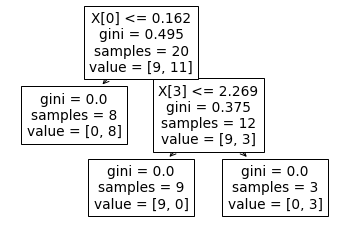

In [137]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(167.4, 195.696, 'X[0] <= -0.246\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(83.7, 152.208, 'X[2] <= -1.395\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(41.85, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(251.10000000000002, 152.208, 'X[3] <= 2.844\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(209.25, 108.72, 'X[0] <= 1.201\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(167.4, 65.232, 'X[1] <= -0.057\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(209.25, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 65.232, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(292.95, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

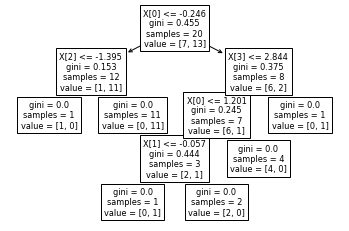

In [138]:
plot_tree(clf2)

[Text(111.60000000000001, 195.696, 'X[0] <= -0.07\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(55.800000000000004, 152.208, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(167.4, 152.208, 'X[2] <= -2.023\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 108.72, 'X[0] <= 0.036\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(167.4, 65.232, 'X[0] <= 0.01\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 65.232, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

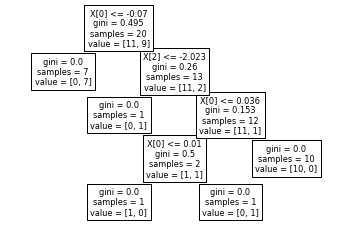

In [139]:
plot_tree(clf3)

In [141]:
print(f"clf1: {clf1.predict(np.array([-2.736812, -1.807328, -0.877387, 0.713485, 0.141199]).reshape(1, 5))}")
print(f"clf2: {clf2.predict(np.array([-2.736812, -1.807328, -0.877387, 0.713485, 0.141199]).reshape(1, 5))}")
print(f"clf3: {clf3.predict(np.array([-2.736812, -1.807328, -0.877387, 0.713485, 0.141199]).reshape(1, 5))}")

clf1: [1]
clf2: [1]
clf3: [1]


In [ ]:
# thus we can do using feature sampling as well as column and row sampling together

### Why Random Forest Performs So Well?

**Github Notebook: https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day65-random-forest/random_forest_demo.ipynb**

### Bagging vs Random Forest
- In bagging I can use different algorithms like Decision Trees, SVM, KNN etc. But in Random Forest, the Decision Trees algorithm is used.
- Feature samplining in Bagging and Random Forest is different. In Bagging the Feature Sampling is done as tree level and in Random Forest the Feature Selection is done as node level.

**See the notebook: https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day65-random-forest/bagging_vs_random_forest.ipynb**

**Bagging Sampling**
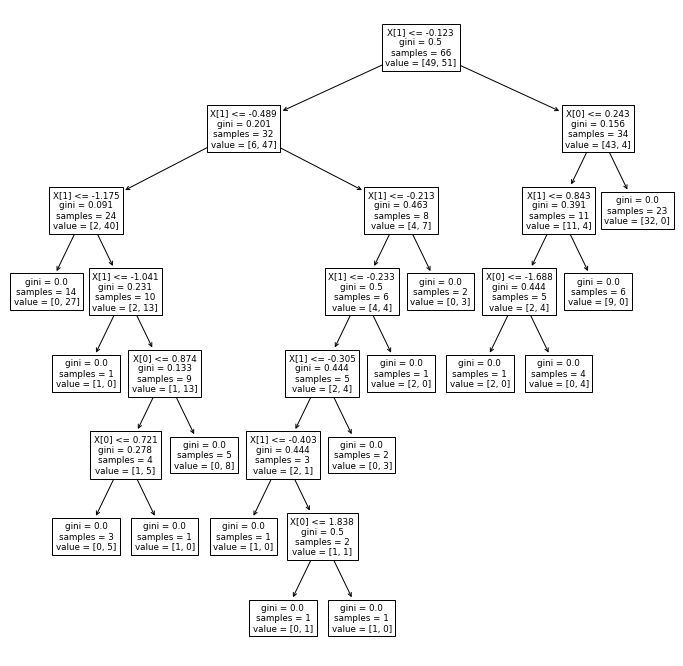

**Random Forest Sampling**
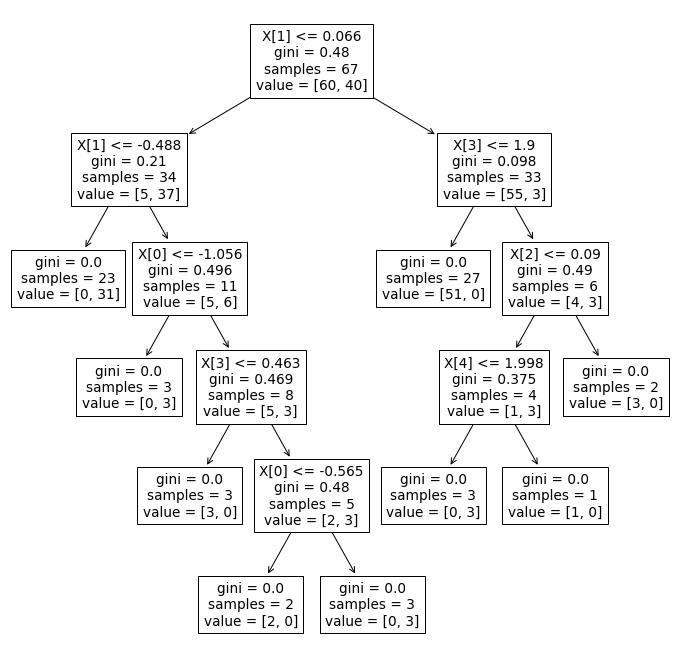

### Hyperparameter Tuning Using GridSearchCV & RandomizedSearchCV

**Notebook: https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day65-random-forest/code-example-random-forest.ipynb**

### OOB Evaluation
In *Sampling with replacement* some rows are selected for most models. But some rows are not selected and there features are not noted by any one of the models. Those non-selected rows are called *OOB (Out of Bag Samples)*. 37% rows are roughly OOB samples. So as validation you can use these data.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("../Datasets/Heart/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
rf = RandomForestClassifier(oob_score = True)

rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [5]:
rf.oob_score_

0.8223140495867769

In [6]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8688524590163934

## Feature Importance Using Random Forest & DecisionTree
Feature Importance is one of those techniques which are used for Feature Selection. You will give the score according to the importance and then you will keep those features.

### Random Forest

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [8]:
df = pd.read_csv("../Datasets/HandWrittenDigits/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


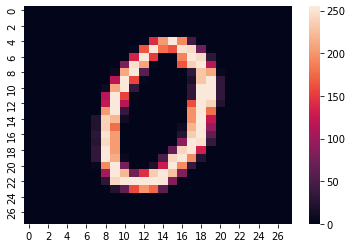

In [13]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

sns.heatmap(X.iloc[5].values.reshape(28, 28))
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X, y)

RandomForestClassifier()

In [15]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.84173278e-07, 2.58420637e-06, 7.09396841e-06, 2.40249282e-06,
       3.77481846e-06, 5.15540139e-06, 2.96887942e-06, 4.11948295e-06,
       3.01728348e-06, 2.68107401e-06, 3.44958876e-06, 0.00000000e+00,
       4.46655527e-07, 4.41129030e-07, 2.59206846e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [16]:
rf.feature_importances_.shape

(784,)

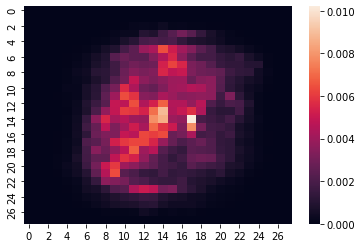

In [17]:
sns.heatmap(rf.feature_importances_.reshape(28, 28))
plt.show()

### DecisionTree

In [18]:
# DecisionTree
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [19]:
X, y = make_classification(n_samples = 5, n_classes = 2, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 0)

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(133.92000000000002, 181.2, 'X[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

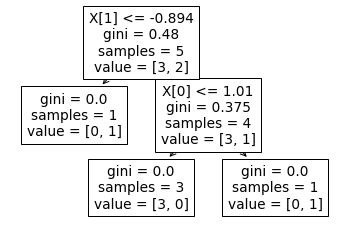

In [20]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [21]:
clf.feature_importances_

array([0.625, 0.375])

$$ni = \frac{N_t}{N}[\text{impurity} - (\frac{N_t - r}{N_t}\text{right_impurity}) - (\frac{N_t - L}{N_t}\text{left_impurity})]$$

**Have to note the formula later.**

In [23]:
X, y = make_classification(n_samples = 15, n_classes = 2, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 0)

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(111.60000000000001, 190.26, 'X[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(167.4, 135.9, 'X[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(223.20000000000002, 81.53999999999999, 'X[1] <= -0.278\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

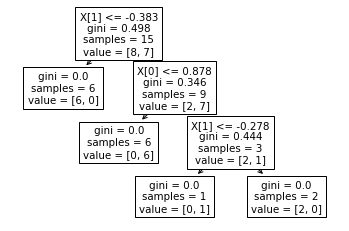

In [24]:
plot_tree(clf)

In [25]:
clf.feature_importances_

array([0.23809524, 0.76190476])

# AdaBoost (Stage wise additive method)

- **Weak Learners**
- **Cecision Stumps**
- **+1 and -1**

$$h(x) = sign(\alpha_1*h_1(x) + \alpha_2*h_2(x) + \alpha_3*h_3(x))$$

$$\alpha = \frac{1}{2}ln(\frac{1-\text{error}}{\text{error}})$$

$$\text{for misclassified, new weight} = \text{current weight} * e^{\alpha_1}$$

$$\text{for correctly classified, new weight } = \text{current weight} * e^{-\alpha_1}$$

## Step By Step

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

pd.options.mode.chained_assignment = None

In [28]:
df = pd.DataFrame()

df["X1"] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df["X2"] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df["label"] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


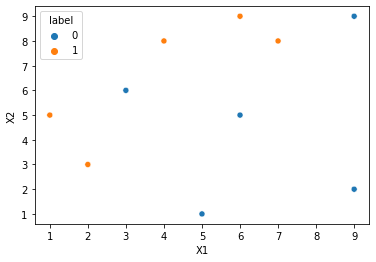

In [30]:
sns.scatterplot(x = df["X1"], y = df["X2"], hue = df["label"])
plt.show()

In [32]:
df["weights"] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 1)

In [34]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [35]:
# step 2 - train 1st model
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

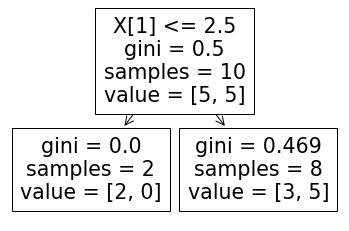

In [38]:
from sklearn.tree import plot_tree

plot_tree(dt1, )

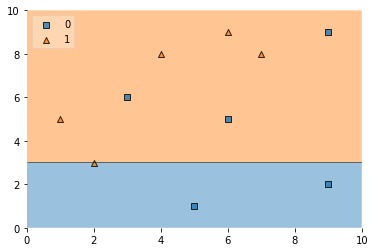

In [39]:
plot_decision_regions(X, y, clf = dt1, legend = 2)
plt.show()

In [40]:
df["y_pred"] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [41]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error)/(error + 0.0000001))

In [42]:
# step 3 - calculate model weight
alpha = calculate_model_weight(0.3) # 0.3 = 0.1 + 0.1 + 0.1 TOTAL 3 ERRORS
alpha 

0.42364893019360184

In [45]:
# step 4 - Update weights
def update_row_weights(row, alpha = 0.423):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [46]:
df["updated_weights"] = df.apply(update_row_weights, axis = 1)

df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [49]:
df["updated_weights"].sum()

0.9165153319682015

In [47]:
df["normalized_weights"] = df["updated_weights"]/df["updated_weights"].sum()

df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [48]:
df["normalized_weights"].sum()

1.0

In [50]:
df["cumsum_upper"] = np.cumsum(df["normalized_weights"])

df["cumsum_lower"] = df["cumsum_upper"] - df["normalized_weights"]

df[["X1", "X2", "label", "weights", "y_pred", "updated_weights", "cumsum_lower", "cumsum_upper"]]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [53]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row["cumsum_upper"] > a and a > row["cumsum_lower"]:
                indices.append(index)
    return indices

In [71]:
index_values = create_new_dataset(df)
index_values

[3, 6, 6, 2, 7, 3, 1, 2, 8, 8]

In [72]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]
second_df

,X1,X2,label,weights
3,4,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1


In [73]:
dt2 = DecisionTreeClassifier(max_depth = 1)

X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

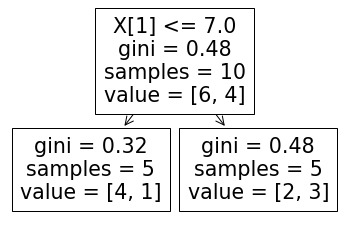

In [74]:
plot_tree(dt2)

<AxesSubplot:>

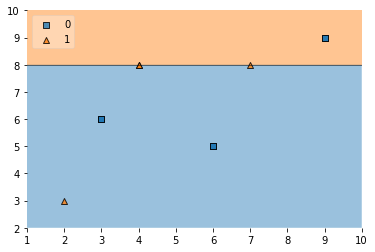

In [75]:
plot_decision_regions(X, y, clf = dt2, legend = 2)

In [76]:
second_df["y_pred"] = dt2.predict(X)

second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,1


In [77]:
alpha2 = calculate_model_weight(0.3)
alpha2

0.42364893019360184

In [78]:
# step 4 - Update weights
def update_row_weights(row, alpha = 0.424):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [79]:
second_df["updated_weights"] = second_df.apply(update_row_weights, axis = 1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.065465
6,6,5,0,0.1,0,0.065465
6,6,5,0,0.1,0,0.065465
2,3,6,0,0.1,0,0.065465
7,7,8,1,0.1,1,0.065465
3,4,8,1,0.1,1,0.065465
1,2,3,1,0.1,0,0.152806
2,3,6,0,0.1,0,0.065465
8,9,9,0,0.1,1,0.152806
8,9,9,0,0.1,1,0.152806


In [80]:
second_df["normalized_weights"] = second_df["updated_weights"]/second_df["updated_weights"].sum()

In [81]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
3,4,8,1,0.1,1,0.065465,0.071416
6,6,5,0,0.1,0,0.065465,0.071416
6,6,5,0,0.1,0,0.065465,0.071416
2,3,6,0,0.1,0,0.065465,0.071416
7,7,8,1,0.1,1,0.065465,0.071416
3,4,8,1,0.1,1,0.065465,0.071416
1,2,3,1,0.1,0,0.152806,0.166696
2,3,6,0,0.1,0,0.065465,0.071416
8,9,9,0,0.1,1,0.152806,0.166696
8,9,9,0,0.1,1,0.152806,0.166696


In [82]:
second_df["cumsum_upper"] = np.cumsum(second_df["normalized_weights"])

second_df["cumsum_lower"] = second_df["cumsum_upper"] - second_df["normalized_weights"]

second_df[["X1", "X2", "label", "weights", "y_pred", "normalized_weights", "cumsum_lower", "cumsum_upper"]]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.071416,0.000000,0.071416
6,6,5,0,0.1,0,0.071416,0.071416,0.142832
6,6,5,0,0.1,0,0.071416,0.142832,0.214248
2,3,6,0,0.1,0,0.071416,0.214248,0.285664
7,7,8,1,0.1,1,0.071416,0.285664,0.357080
3,4,8,1,0.1,1,0.071416,0.357080,0.428496
1,2,3,1,0.1,0,0.166696,0.428496,0.595192
2,3,6,0,0.1,0,0.071416,0.595192,0.666608
8,9,9,0,0.1,1,0.166696,0.666608,0.833304
8,9,9,0,0.1,1,0.166696,0.833304,1.000000


In [83]:
index_values = create_new_dataset(second_df)

third_df = second_df.iloc[index_values, [0, 1, 2, 3]]
third_df

,X1,X2,label,weights
2,3,6,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1


In [84]:
dt3 = DecisionTreeClassifier(max_depth = 1)

X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

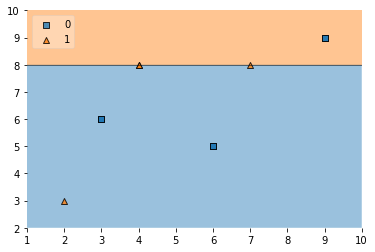

In [85]:
plot_decision_regions(X, y, clf = dt3, legend = 2)
plt.show()

In [86]:
third_df["y_pred"] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
1,2,3,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1
8,9,9,0,0.1,1


In [87]:
alpha3 = calculate_model_weight(0.6)
alpha3

-0.20273255405408214

In [89]:
print(alpha, alpha2, alpha3)

0.42364893019360184 0.42364893019360184 -0.20273255405408214


In [90]:
# prediction
query = np.array([1, 5]).reshape(1, 2)
print(f"dt1: {dt1.predict(query)}")
print(f"dt2: {dt2.predict(query)}")
print(f"dt3: {dt3.predict(query)}")

print("Actual: 1")

dt1: [1]
dt2: [0]
dt3: [0]
Actual: 1


In [91]:
alpha * 1 + alpha2 * (-1) + alpha3 * (-1)

0.20273255405408214

In [92]:
np.sign(alpha * 1 + alpha2 * (-1) + alpha3 * (-1))

1.0

In [93]:
query = np.array([9, 9]).reshape(1, 2)
print(f"dt1: {dt1.predict(query)}")
print(f"dt2: {dt2.predict(query)}")
print(f"dt3: {dt3.predict(query)}")

print("Actual: 0")

dt1: [1]
dt2: [1]
dt3: [1]
Actual: 0


In [94]:
alpha * 1 + alpha2 * (1) + alpha3 * (1)

0.6445653063331216

In [95]:
np.sign(alpha * 1 + alpha2 * (1) + alpha3 * (1))

1.0

## Using Scikit Learn Using GridSearchCV

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [98]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

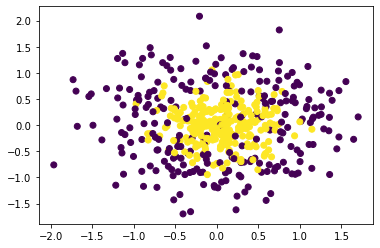

In [99]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### Without Any Hyperparameters Tuning

In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

In [101]:
abc.fit(X,y)

AdaBoostClassifier()

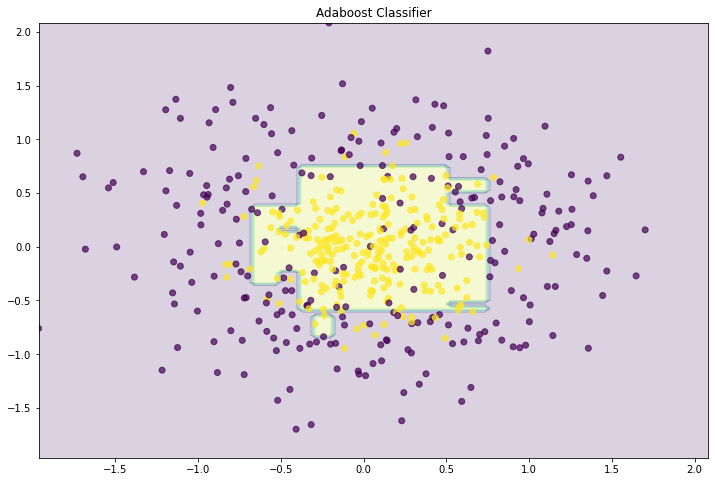

In [102]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

### Two Important Hyperparameters (n_estimators & learning_rate)

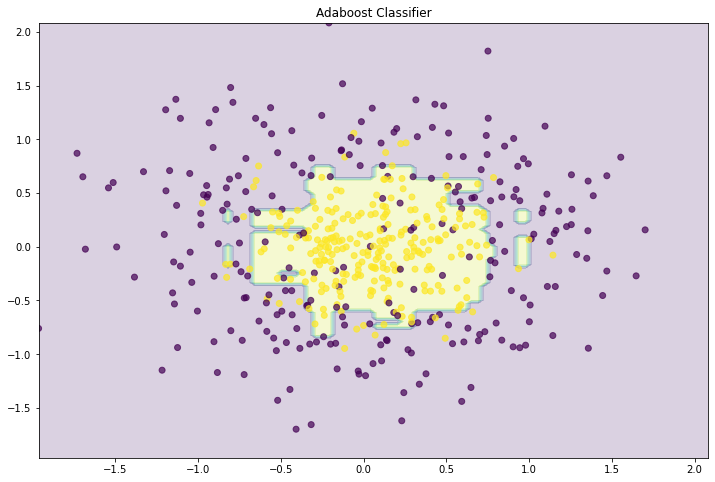

In [103]:
abc = AdaBoostClassifier(n_estimators=1500, learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

### Using GridSearchCV

In [105]:
%%time

from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
Wall time: 9.44 s


In [ ]:
# Link
# https://stats.stackexchange.com/questions/82323/shrinkage-parameter-in-adaboost

## Bagging Vs Boosting

- **Type of model used:** Our target is low bias and low varience model. In bagging, we are selecting those algorithms or models which have low bias but high variance like fully grown decision tree, knn with low neighbour count. But in Boosting, high bias and low variance models are used like shallow decision tree. 
- **Sequential vs Parallel:** In Bagging, all the models are trained parallelly. But in Boosting, the models are trained sequentially.
- **Weighted of base learners:** The weights of models in Bagging are same but in Boosting, every model has weights to predict.

# Gradient Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

pd.options.mode.chained_assignment = None

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


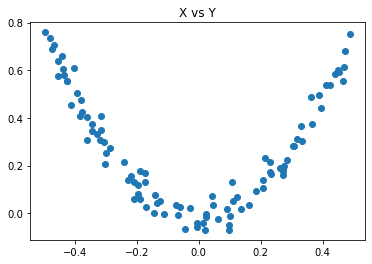

In [4]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')
plt.show()

In [5]:
# model 1: mean of target column
df['pred1'] = df['y'].mean()
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [6]:
df['res1'] = df['y'] - df['pred1']
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


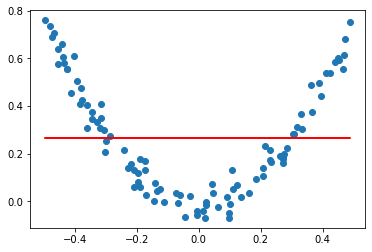

In [7]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.show()

In [8]:
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)  # between 8-32

tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

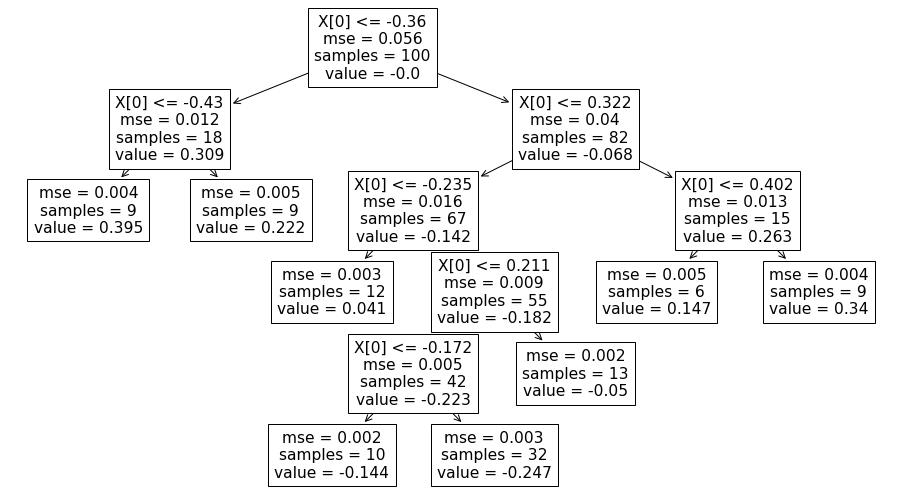

In [10]:
plt.figure(figsize = (16, 9))
plot_tree(tree1)
plt.show()

In [11]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

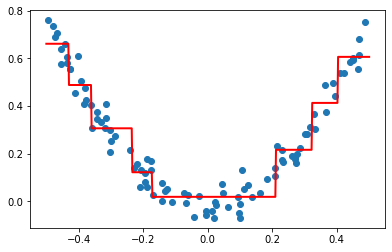

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.show()

In [13]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [14]:
df['res2'] = df['y'] - df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [15]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

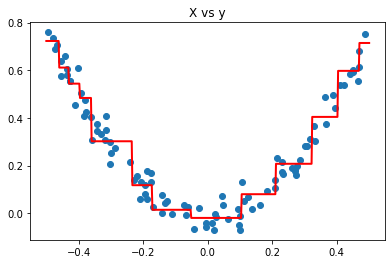

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')
plt.show()

In [17]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

    if number == 0:
        return 
    else:
    # do gradient boosting

        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo = y

        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y)

        regs.append(tree_reg)

        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:, 0], foo,"r.")
        plt.show()

        gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


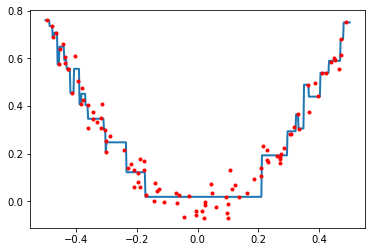

4


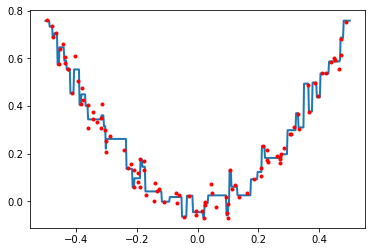

3


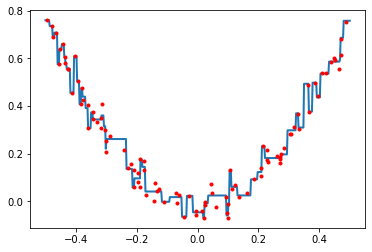

2


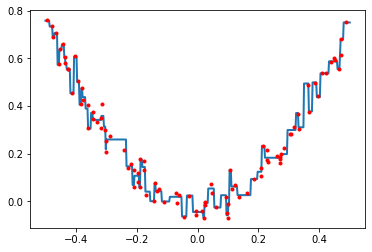

1


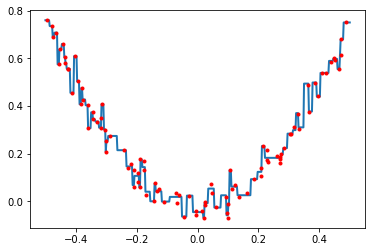

In [18]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

## Adaboost Vs Gradient Boost

- In Adaboost we are using decision stump which has max leaf node 1 to 2. But in Gradient Boost, the max leaf nodes are in between of 8 to 32.
- In Adaboost, the models' weights are different. The weights tell the importance of the model. But in Gradient Boost, the weights of all models are same and that is called as learning rate.

## Mathematical Expression:
- **https://towardsdatascience.com/demystifying-maths-of-gradient-boosting-bd5715e82b7c**
- **https://medium.com/analytics-vidhya/math-behind-gbm-and-xgboost-d00e8536b7de**

# Stacking & Blending

In [1]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv("../Datasets/Heart/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = df.drop(columns = ["target"], axis = 1)
y = df["target"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X_train.shape, y_train.shape)

(242, 13) (242,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
estimators = [
    ("rf", RandomForestClassifier(n_estimators = 10, random_state = 42)),
    ("knn", KNeighborsClassifier(n_neighbors = 10)),
    ("gbdt", GradientBoostingClassifier())
]

In [8]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators = estimators,
    final_estimator = LogisticRegression(),
    cv = 10
)

In [9]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [10]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8852459016393442